Naive bayes with Normalisation


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [ ]:
#from google.colab import files 
#loaded = files.upload()

df=pd.read_csv('data-modified.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,highu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,Dalc,Walc,Avgalc,Alcuse,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,3,6,1,1,1,low,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4,1,1,1,low,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,3,10,2,3,3,high,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,5,2,1,1,1,low,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4,1,2,2,low,6,10,10


In [ ]:
df.shape

(395, 35)

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
highu         0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
health        0
absences      0
Dalc          0
Walc          0
Avgalc        0
Alcuse        0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
# To convert Categorical variables into numeric form

df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=np.where(df[['schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']]=='no',0,1)
df[['sex']]=np.where(df[['sex']]=='F',0,1)
df[['address']]=np.where(df[['address']]=='R',0,1)
df[['famsize']]=np.where(df[['famsize']]=='LE3',0,1)
df[['Pstatus']]=np.where(df[['Pstatus']]=='A',0,1)
df[['guardian']]=np.where(df[['guardian']]=='mother',0,1)
df[['Alcuse']] = np.where(df[['Alcuse']]=='low',0,1)
df = df.drop(columns=['school','Mjob','Fjob','reason','address','nursery','higher','Fedu','address'])

df.head()

,sex,age,famsize,Pstatus,highu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,health,absences,Dalc,Walc,Avgalc,Alcuse,G1,G2,G3
0,0,18,1,0,4,0,2,2,0,1,0,0,0,0,0,4,3,4,3,6,1,1,1,0,5,6,6
1,0,17,1,1,1,1,1,2,0,0,1,0,0,1,0,5,3,3,3,4,1,1,1,0,5,5,6
2,0,15,0,1,1,0,1,2,3,1,0,1,0,1,0,4,3,2,3,10,2,3,3,1,7,8,10
3,0,15,1,1,4,0,1,3,0,0,1,1,1,1,1,3,2,2,5,2,1,1,1,0,15,14,15
4,0,16,1,1,3,1,1,2,0,0,1,1,0,0,0,4,3,2,5,4,1,2,2,0,6,10,10


In [ ]:

x = df.iloc[:,0:19].values


In [ ]:

y = df.loc[:,'Alcuse'].values
y.shape
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#split the dataset into train and test 
x_train, x_test ,y_train, y_test= train_test_split(x,y, test_size = 0.25, random_state = 0)
x_train.shape
x_test.shape

(99, 19)

In [ ]:
# Feature scaling or normalization

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [ ]:
gnb = GaussianNB()
used_features= ['sex',	'age' , 'famsize'	, 'Pstatus' ,	'highu' ,	'guardian' , 'traveltime'	,
                'studytime' ,	'failures' ,	'schoolsup' ,	'famsup' ,	'paid'	, 'activities' ,	
                'internet' ,	'romantic' ,'famrel' ,	'freetime' ,	'goout' ,	'health' ,	'absences' ,	'Dalc' ,	'Walc' , 'Avgalc'	]


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        77
           1       0.27      0.27      0.27        22

    accuracy                           0.68        99
   macro avg       0.53      0.53      0.53        99
weighted avg       0.68      0.68      0.68        99



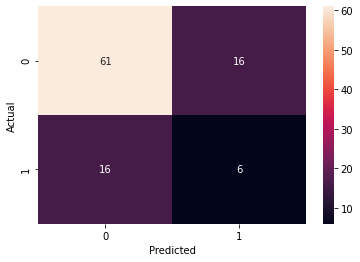

In [ ]:
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True)
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        77
           1       0.38      0.36      0.37        22

    accuracy                           0.73        99
   macro avg       0.60      0.60      0.60        99
weighted avg       0.72      0.73      0.72        99



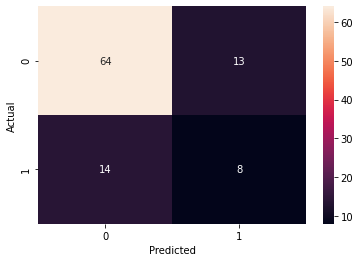

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
BernNB = BernoulliNB(binarize = True)
BernNB.fit(x_train,y_train)

y_pred = BernNB.predict(x_test)


confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True)
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit(data))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MultiNB = MultinomialNB()
MultiNB.fit(x_train,y_train)

y_pred = MultiNB.predict(x_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True)
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))